In [56]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [57]:
data_dir = 'shapes'

In [58]:
image_paths = []
labels = []

for category in os.listdir(data_dir):
    category_dir = os.path.join(data_dir, category)
    for image_file in os.listdir(category_dir):
        if image_file.endswith(".png"):
            image_path = os.path.join(category_dir, image_file)
            image_paths.append(image_path)
            labels.append(category)
            
print("Found {} images".format(len(image_paths)))
print("Classes: {}".format(np.unique(labels)))

Found 300 images
Classes: ['circles' 'squares' 'triangles']


In [59]:
for category in set(labels):
    print('Category:', category)
    category_images = [image_paths[i] for i in range(len(labels)) if labels[i] == category]
    for image_path in category_images[:1]:
        img = Image.open(image_path)
        # plt.imshow(img, cmap='gray')
        # plt.show()
        display(img)

Category: triangles


Category: circles


Category: squares


In [60]:
# Naloganje slik in pretvorba v dvodimenzionalna polja (sive-slike)
images = [np.array(Image.open(image_path).convert('L')) for image_path in image_paths]

In [61]:
# Dvodimenzionalna polja v enodimenzionalna - sploščitev
images = [image.flatten() for image in images]

In [62]:
images = np.array(images)

In [63]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.3, random_state=4321, shuffle=True)

In [64]:
clf = DecisionTreeClassifier(random_state=1234)
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

[Text(0.26917613636363635, 0.9666666666666667, '239 <= 254.5\ngini = 0.666\nsamples = 210\nvalue = [70, 66, 74]\nclass = triangles'),
 Text(0.10795454545454546, 0.9, '484 <= 233.5\ngini = 0.582\nsamples = 71\nvalue = [19, 12, 40]\nclass = triangles'),
 Text(0.045454545454545456, 0.8333333333333334, '228 <= 53.5\ngini = 0.105\nsamples = 18\nvalue = [0, 1, 17]\nclass = triangles'),
 Text(0.022727272727272728, 0.7666666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = squares'),
 Text(0.06818181818181818, 0.7666666666666667, 'gini = 0.0\nsamples = 17\nvalue = [0, 0, 17]\nclass = triangles'),
 Text(0.17045454545454544, 0.8333333333333334, '343 <= 254.5\ngini = 0.64\nsamples = 53\nvalue = [19, 11, 23]\nclass = triangles'),
 Text(0.11363636363636363, 0.7666666666666667, '356 <= 243.0\ngini = 0.363\nsamples = 21\nvalue = [5, 0, 16]\nclass = triangles'),
 Text(0.09090909090909091, 0.7, 'gini = 0.0\nsamples = 4\nvalue = [4, 0, 0]\nclass = circles'),
 Text(0.13636363636363635, 0.7,

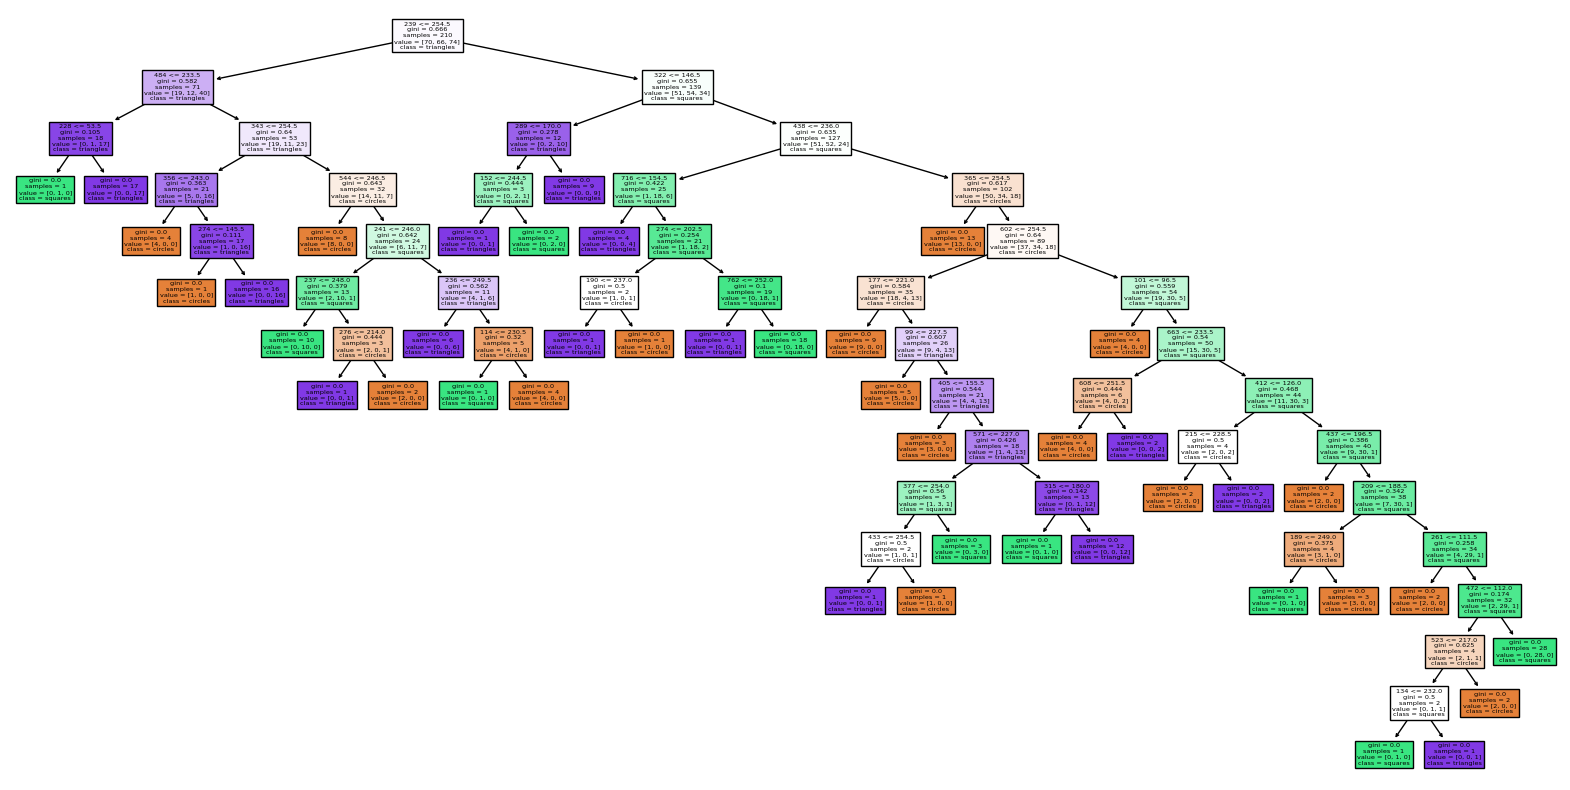

In [65]:
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=range(784), class_names=np.unique(labels))

In [66]:
accuracy = accuracy_score(y_test, y_pred)
f1_weighted = f1_score(y_test, y_pred, average='weighted')
precision_weighted = precision_score(y_test, y_pred, average='weighted')
recall_weighted = recall_score(y_test, y_pred, average='weighted')

print("Točnost:", accuracy)
print("Utežena F1 vrednost:", f1_weighted)
print("Utežena preciznost:", precision_weighted)
print("Utežen priklic:", recall_weighted)

Točnost: 0.45555555555555555
Utežena F1 vrednost: 0.45228010108420963
Utežena preciznost: 0.47552910052910047
Utežen priklic: 0.45555555555555555


In [67]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(x_train, y_train)
knn_y_pred = knn.predict(x_test)

In [68]:
knn_accuracy = accuracy_score(y_test, knn_y_pred)
knn_f1_weighted = f1_score(y_test, knn_y_pred, average='weighted')
knn_precision_weighted = precision_score(y_test, knn_y_pred, average='weighted')
knn_recall_weighted = recall_score(y_test, knn_y_pred, average='weighted')

print("Točnost:", knn_accuracy)
print("Utežena F1 vrednost:", knn_f1_weighted)
print("Utežena preciznost:", knn_precision_weighted)
print("Utežen priklic:", knn_recall_weighted)

Točnost: 0.5555555555555556
Utežena F1 vrednost: 0.5229587118671626
Utežena preciznost: 0.6223251612361085
Utežen priklic: 0.5555555555555556


Text(0.5, 1.0, 'Accuracy')

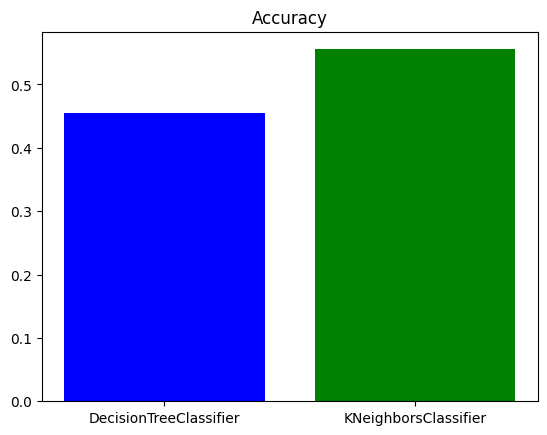

In [69]:
plt.bar(['DecisionTreeClassifier', 'KNeighborsClassifier'], [accuracy, knn_accuracy], color=['blue', 'green'])
plt.title('Accuracy')

Text(0.5, 1.0, 'F1 weighted')

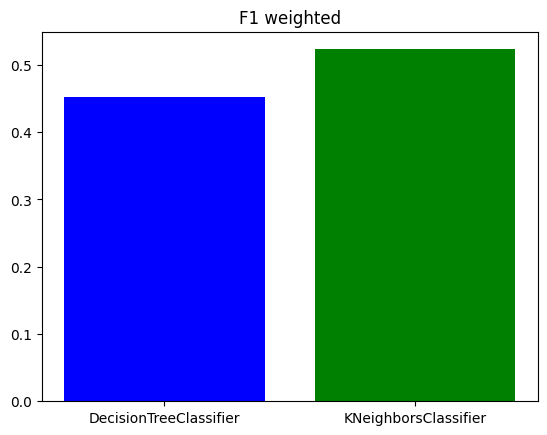

In [70]:
plt.bar(['DecisionTreeClassifier', 'KNeighborsClassifier'], [f1_weighted, knn_f1_weighted], color=['blue', 'green'])
plt.title('F1 weighted')

Text(0.5, 1.0, 'Precision weighted')

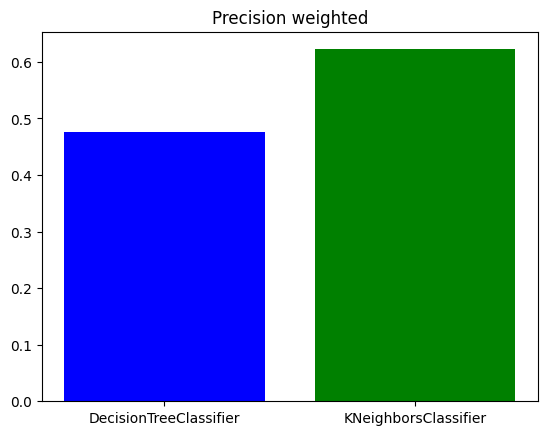

In [71]:
plt.bar(['DecisionTreeClassifier', 'KNeighborsClassifier'], [precision_weighted, knn_precision_weighted], color=['blue', 'green'])
plt.title('Precision weighted')

Text(0.5, 1.0, 'Recall weighted')

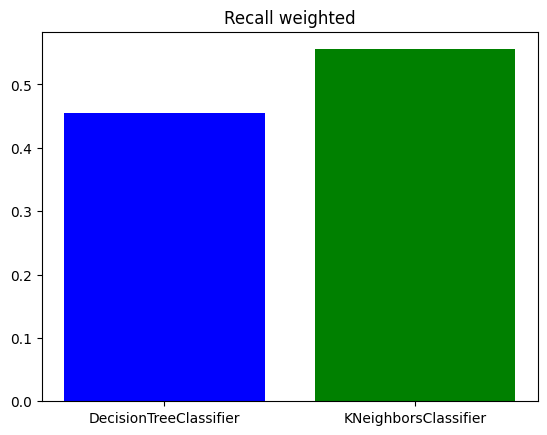

In [72]:
plt.bar(['DecisionTreeClassifier', 'KNeighborsClassifier'], [recall_weighted, knn_recall_weighted], color=['blue', 'green'])
plt.title('Recall weighted')